## Observations and Insights

## Dependencies and starter code

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_results_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

##rename columns for ease of use
combined_results_data = combined_results_data.rename(columns={"Drug Regimen":"Drug",
                                                              "Age_months":"Age (months)",
                                                              "Tumor Volume (mm3)":"Tumor Volume",})
combined_results_data.head()

,Mouse ID,Drug,Sex,Age (months),Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumorVol_df = combined_results_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume"]

# Convert to DataFrame
meanTumorVol_df = pd.DataFrame(meanTumorVol_df)
meanTumorVol_df = meanTumorVol_df.rename(columns={"Tumor Volume": "Mean for Tumor Volume"})

# Preview DataFrame
meanTumorVol_df

Mean for Tumor Volume
Drug      Timepoint                       
Capomulin 0                      45.000000
          5                      44.266086
          10                     43.084291
          15                     42.064317
          20                     40.716325
...                                    ...
Zoniferol 25                     55.432935
          30                     57.713531
          35                     60.089372
          40                     62.916692
          45                     65.960888

[100 rows x 1 columns]

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
#the tumor volume for each regimen
medTumorVol_df = combined_results_data.groupby(["Drug", "Timepoint"]).median()["Tumor Volume"]

# Convert to DataFrame
medTumorVol_df = pd.DataFrame(medTumorVol_df)
medTumorVol_df = medTumorVol_df.rename(columns={"Tumor Volume": "Median for Tumor Volume"})

# Preview DataFrame
medTumorVol_df

Median for Tumor Volume
Drug      Timepoint                         
Capomulin 0                        45.000000
          5                        45.597064
          10                       43.421014
          15                       42.798160
          20                       40.716428
...                                      ...
Zoniferol 25                       55.676604
          30                       57.419744
          35                       60.365832
          40                       62.274543
          45                       65.684689

[100 rows x 1 columns]

In [5]:
# Store the median Tumor Volume Data Grouped by Drug and Timepoint 
variTumorVol_df = combined_results_data.groupby(["Drug", "Timepoint"]).var()["Tumor Volume"]

# Convert to DataFrame
variTumorVol_df = pd.DataFrame(variTumorVol_df)
variTumorVol_df = variTumorVol_df.rename(columns={"Tumor Volume": "Variance for Tumor Volume"})

# Preview DataFrame
variTumorVol_df

Variance for Tumor Volume
Drug      Timepoint                           
Capomulin 0                           0.000000
          5                           5.030889
          10                         12.344133
          15                         16.878693
          20                         19.035028
...                                        ...
Zoniferol 25                          5.808348
          30                          9.601024
          35                         10.876760
          40                         13.958456
          45                         14.100301

[100 rows x 1 columns]

In [14]:
semTumorVol_df = combined_results_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume"]

# Convert to DataFrame
semTumorVol_df = pd.DataFrame(semTumorVol_df)
semTumorVol_df = semTumorVol_df.rename(columns={"Tumor Volume": "SEM for Tumor Volume"})

# Preview DataFrame
semTumorVol_df

SEM for Tumor Volume
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.448593
          10                     0.702684
          15                     0.838617
          20                     0.909731
...                                   ...
Zoniferol 25                     0.602513
          30                     0.800043
          35                     0.881426
          40                     0.998515
          45                     1.003576

[100 rows x 1 columns]

## Bar plots

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas (#see 02 from lesson 2)
# Filter the DataFrame down only to those columns to chart
drug_and_volume = combined_results_data[["Timepoint", "Drug", "Tumor Volume"]]

# Set the index to be "Drug" so they will be used as labels
drug_and_volume = drug_and_volume.set_index("Drug")
drug_and_volume.head()

,Timepoint,Tumor Volume
Drug,,
Ramicane,0,45.000000
Ramicane,5,38.825898
Ramicane,10,35.014271
Ramicane,15,34.223992
Ramicane,20,32.997729


In [8]:
# Set x axis and tick locations
x_axis = np.arange(len(drug_and_volume))
tick_locations = [value for value in x_axis]

KeyError: 'Drug'

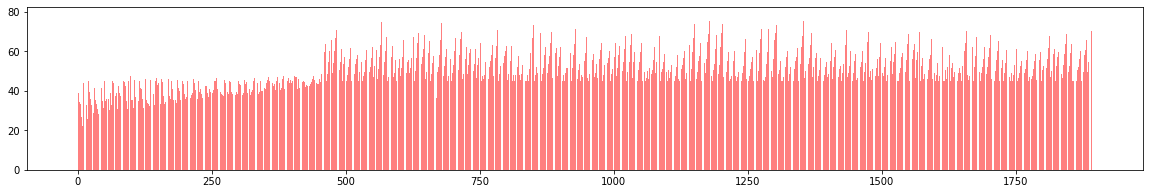

In [10]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, drug_and_volume["Tumor Volume"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, combined_data_results["Drug"], rotation="vertical")

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen